In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [16]:
movies = pd.read_csv("Movie+Assignment+Data.csv")
movies

movies_copy = movies


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [17]:
# Write your code for inspection here
# Write your code for inspection here

print(movies.info())

print(movies.shape)

print(movies.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [18]:
# Write your code for column-wise null count here
pointer=len(movies)
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [19]:
# Write your code for row-wise null count here

movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [20]:
# Write your code for column-wise null percentages here
round(100*(movies.isnull().sum()/len(movies.index)),2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [21]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies.drop(columns=['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],inplace=True)          
#print(movies.info())
#print()

print(round(100*(movies.isnull().sum()/len(movies.index)),2))


director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [22]:
# Write your code for dropping the rows here
movies=movies[~np.isnan(movies['gross'])]
movies=movies[~np.isnan(movies['budget'])]
print(round(100*(movies.isnull().sum(axis=0)/len(movies.index)),2))

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64


In [23]:
# Write your code for filling the NaN values in the 'language' column here
movies['language'].fillna('English', inplace = True)

-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [25]:
# Write your code for checking number of retained rows here
round(100*(len(movies)/pointer),2)

77.16

## **Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!


## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [26]:
# Write your code for unit conversion here

movies['gross'] = movies['gross'].apply(lambda x: "{}".format((x/1000000)))
movies['budget'] = movies['budget'].apply(lambda x: "{}".format((x/1000000)))

movies


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.42476,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.007,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.007,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2.04092,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.007,1992.0,6.9,0
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.009,2011.0,6.4,413


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [27]:
# Write your code for creating the profit column here



movies['gross']=movies.gross.astype(float)
movies['budget']=movies.budget.astype(float)
movies.info()

movies['profit'] = movies['gross'] - movies['budget']
movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 13 columns):
director_name             3891 non-null object
num_critic_for_reviews    3890 non-null float64
gross                     3891 non-null float64
genres                    3891 non-null object
actor_1_name              3888 non-null object
movie_title               3891 non-null object
num_voted_users           3891 non-null int64
num_user_for_reviews      3891 non-null float64
language                  3891 non-null object
budget                    3891 non-null float64
title_year                3891 non-null float64
imdb_score                3891 non-null float64
movie_facebook_likes      3891 non-null int64
dtypes: float64(6), int64(2), object(5)
memory usage: 425.6+ KB


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,523.505847
1,Gore Verbinski,302.0,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,9.404152
2,Sam Mendes,602.0,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,-44.925825
3,Christopher Nolan,813.0,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,198.130642
5,Andrew Stanton,462.0,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,-190.641321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.424760,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.417760
5034,Neill Dela Llana,35.0,0.070071,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.063071
5035,Robert Rodriguez,56.0,2.040920,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,2.033920
5037,Edward Burns,14.0,0.004584,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,-0.004416


In [28]:
# Write your code for sorting the dataframe here
tem= movies.sort_values(by='profit', ascending = False)


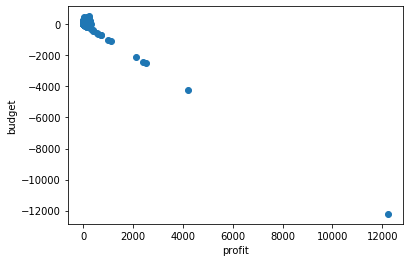

In [29]:
# Write code for profit vs budget plot here

import matplotlib.pyplot as plt
plt.xlabel("profit")
plt.ylabel("budget")
plt.scatter(tem['budget'],tem['profit'])

plt.show()

In [0]:
# Write your code to get the top 10 profiting movies here
top10 = movies['profit'].head(10)
top10

0     237.0
1     300.0
2     245.0
3     250.0
5     263.7
6     258.0
7     260.0
8     250.0
9     250.0
10    250.0
Name: profit, dtype: float64

-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [0]:
# Write your code for dropping duplicate values here
movies = movies.drop_duplicates()
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,237.0000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,237.0000
1,Gore Verbinski,302.0,300.0000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,300.0000
2,Sam Mendes,602.0,245.0000,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,245.0000
3,Christopher Nolan,813.0,250.0000,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,250.0000
5,Andrew Stanton,462.0,263.7000,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,263.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.0070,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.0070
5034,Neill Dela Llana,35.0,0.0070,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.0070
5035,Robert Rodriguez,56.0,0.0070,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,0.0070
5037,Edward Burns,14.0,0.0090,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,0.0090


In [0]:
# Write code for repeating subtask 2 here
movies['profit']=movies['gross']= movies['budget']
movies

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,237.0000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,237.0000
1,Gore Verbinski,302.0,300.0000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,300.0000
2,Sam Mendes,602.0,245.0000,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,245.0000
3,Christopher Nolan,813.0,250.0000,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,250.0000
5,Andrew Stanton,462.0,263.7000,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,263.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.0070,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.0070
5034,Neill Dela Llana,35.0,0.0070,Thriller,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.0070
5035,Robert Rodriguez,56.0,0.0070,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,0.0070
5037,Edward Burns,14.0,0.0090,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,0.0090



# **Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [0]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDb_Top_250 = movies.sort_values(by='imdb_score', ascending = False).head(250)
IMDb_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,25.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,25.0
3466,Francis Ford Coppola,208.0,6.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,6.0
2837,Francis Ford Coppola,149.0,13.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,13.0
66,Christopher Nolan,645.0,185.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,185.0
339,Peter Jackson,328.0,94.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,Paul Haggis,287.0,6.5,Crime|Drama|Thriller,Don Cheadle,Crash,361169,1624.0,English,6.5,2004.0,7.9,18000,6.5
2666,James Ivory,58.0,11.5,Drama|Romance,Anthony Hopkins,The Remains of the Day,45703,156.0,English,11.5,1993.0,7.9,0,11.5
2558,Edgar Wright,285.0,8.0,Action|Comedy|Mystery,Bill Bailey,Hot Fuzz,352695,687.0,English,8.0,2007.0,7.9,17000,8.0
3510,Yash Chopra,29.0,7.0,Drama|Musical|Romance,Shah Rukh Khan,Veer-Zaara,34449,119.0,Hindi,7.0,2004.0,7.9,2000,7.0


In [0]:
IMDb_Top_250['Rank']= IMDb_Top_250['num_voted_users'].rank(method= 'max')
IMDb_Top_250

IMDb_Top_250.sort_values(by="Rank",ascending = True) 

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
4838,Michael Roemer,24.0,0.16,Drama|Romance,Yaphet Kotto,Nothing But a Man,891,26.0,English,0.16,1964.0,8.1,363,0.16,1.0
4748,Marius A. Markevicius,26.0,0.50,Documentary|Sport,Tommy Sheppard,The Other Dream Team,3086,9.0,English,0.50,2012.0,8.4,0,0.50,2.0
4289,David Sington,107.0,2.00,Documentary|History,John F. Kennedy,In the Shadow of the Moon,5475,44.0,English,2.00,2007.0,8.1,0,2.00,3.0
4499,Anna Muylaert,111.0,4.00,Comedy|Drama,Alex Huszar,The Second Mother,7025,26.0,Portuguese,4.00,2015.0,7.9,0,4.00,4.0
4286,Charles Ferguson,79.0,2.00,Documentary|War,Campbell Scott,No End in Sight,7314,55.0,English,2.00,2007.0,8.3,0,2.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,Quentin Tarantino,215.0,8.00,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195.0,English,8.00,1994.0,8.9,45000,8.00,246.0
683,David Fincher,315.0,63.00,Drama,Brad Pitt,Fight Club,1347461,2968.0,English,63.00,1999.0,8.8,48000,63.00,247.0
97,Christopher Nolan,642.0,160.00,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.00,2010.0,8.8,175000,160.00,248.0
66,Christopher Nolan,645.0,185.00,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.00,2008.0,9.0,37000,185.00,249.0


In [0]:


# Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film = IMDb_Top_250[IMDb_Top_250.language !='English']
Top_Foreign_Lang_Film 

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
4498,Sergio Leone,181.0,1.200000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.200000,1966.0,8.9,20000,1.200000,167.0
4747,Akira Kurosawa,153.0,2.000000,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.000000,1954.0,8.7,11000,2.000000,84.0
4029,Fernando Meirelles,214.0,3.300000,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.300000,2002.0,8.7,28000,3.300000,175.0
2373,Hayao Miyazaki,246.0,19.000000,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.000000,2001.0,8.6,28000,19.000000,142.0
4259,Florian Henckel von Donnersmarck,215.0,2.000000,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.000000,2006.0,8.5,39000,2.000000,92.0
3931,Ron Fricke,115.0,4.000000,Documentary|Music,Collin Alfredo St. Dic,Samsara,22457,69.0,None,4.000000,2011.0,8.5,26000,4.000000,10.0
4921,Majid Majidi,46.0,0.180000,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.180000,1997.0,8.5,0,0.180000,13.0
1298,Jean-Pierre Jeunet,242.0,77.000000,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314.0,French,77.000000,2001.0,8.4,39000,77.000000,176.0
4105,Chan-wook Park,305.0,3.000000,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.000000,2003.0,8.4,43000,3.000000,125.0
2323,Hayao Miyazaki,174.0,2400.000000,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.000000,1997.0,8.4,11000,2400.000000,83.0


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [0]:
# Write your code for extracting the top 10 directors here
top10director= movies.sort_values(by= (['imdb_score', 'director_name']), ascending= (False,True))
top10director.head(10)


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,25.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144.0,English,25.0,1994.0,9.3,108000,25.0
3466,Francis Ford Coppola,208.0,6.0,Crime|Drama,Al Pacino,The Godfather,1155770,2238.0,English,6.0,1972.0,9.2,43000,6.0
66,Christopher Nolan,645.0,185.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,185.0
2837,Francis Ford Coppola,149.0,13.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650.0,English,13.0,1974.0,9.0,14000,13.0
339,Peter Jackson,328.0,94.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189.0,English,94.0,2003.0,8.9,16000,94.0
3355,Quentin Tarantino,215.0,8.0,Crime|Drama,Bruce Willis,Pulp Fiction,1324680,2195.0,English,8.0,1994.0,8.9,45000,8.0
4498,Sergio Leone,181.0,1.2,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.2,1966.0,8.9,20000,1.2
1874,Steven Spielberg,174.0,22.0,Biography|Drama|History,Liam Neeson,Schindler's List,865020,1273.0,English,22.0,1993.0,8.9,41000,22.0
97,Christopher Nolan,642.0,160.0,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,160.0
683,David Fincher,315.0,63.0,Drama,Brad Pitt,Fight Club,1347461,2968.0,English,63.0,1999.0,8.8,48000,63.0


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [0]:
# Write your code for extracting the first two genres of each movie here
new = movies["genres"] .str.split("|", n = -1, expand = True)

# new columus for genre_1 columns
movies["genre_1"] = new[0]

# new columus for genre_2 columns
movies["genre_2"] = new[1]

#Dropping old genres columns
movies.drop(columns=["genres"], inplace = True)

movies

,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,237.0000,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,237.0000,Action,Adventure
1,Gore Verbinski,302.0,300.0000,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,300.0000,Action,Adventure
2,Sam Mendes,602.0,245.0000,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,245.0000,Action,Adventure
3,Christopher Nolan,813.0,250.0000,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,250.0000,Action,Thriller
5,Andrew Stanton,462.0,263.7000,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,263.7000,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.0070,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.0070,Drama,Sci-Fi
5034,Neill Dela Llana,35.0,0.0070,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.0070,Thriller,None
5035,Robert Rodriguez,56.0,0.0070,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,0.0070,Action,Crime
5037,Edward Burns,14.0,0.0090,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,0.0090,Comedy,Drama


In [0]:
#Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the genre_2 will be the same as genre_1
#the genres are same as genre_1
#total numbers of none(null) values
movies.isnull().sum()

director_name               0
num_critic_for_reviews      1
gross                       0
actor_1_name                3
movie_title                 0
num_voted_users             0
num_user_for_reviews        0
language                    0
budget                      0
title_year                  0
imdb_score                  0
movie_facebook_likes        0
profit                      0
genre_1                     0
genre_2                   382
dtype: int64

In [0]:
#replace the genre_1 with genres_2
movies.genre_2.fillna(movies.genre_1, inplace=True)
movies

,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,237.0000,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,237.0000,Action,Adventure
1,Gore Verbinski,302.0,300.0000,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,300.0000,Action,Adventure
2,Sam Mendes,602.0,245.0000,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,245.0000,Action,Adventure
3,Christopher Nolan,813.0,250.0000,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,250.0000,Action,Thriller
5,Andrew Stanton,462.0,263.7000,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,263.7000,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.0070,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.0070,Drama,Sci-Fi
5034,Neill Dela Llana,35.0,0.0070,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.0070,Thriller,Thriller
5035,Robert Rodriguez,56.0,0.0070,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,0.0070,Action,Crime
5037,Edward Burns,14.0,0.0090,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,0.0090,Comedy,Drama


In [0]:
# Write your code for grouping the dataframe here
movies_by_segment = movies.groupby(['genre_1', 'genre_2'])
movies_by_segment

In [0]:

# Write your code for getting the 5 most popular combo of genres here
PopGenre = movies_by_segment['gross'].mean()
PopGenre.sort_values(ascending = False).head (5)

genre_1    genre_2  
Action     Animation    195.187500
Drama      Musical      113.883333
Adventure  Animation    106.843590
Action     Family       105.000000
Adventure  Sci-Fi       104.500000
Name: gross, dtype: float64

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [0]:
# Write your code for creating three new dataframes here
# Include all movies in which Meryl_Streep is the lead
Meryl_Streep = Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Meryl_Streep

,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
410,Nancy Meyers,187.0,85.0,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,85.0,Comedy,Drama
1106,Curtis Hanson,42.0,45.0,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,45.0,Action,Adventure
1204,Nora Ephron,252.0,40.0,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,40.0,Biography,Drama
1408,David Frankel,208.0,35.0,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,35.0,Comedy,Drama
1483,Robert Redford,227.0,35.0,Meryl Streep,Lions for Lambs,41170,298.0,English,35.0,2007.0,6.2,0,35.0,Drama,Thriller
1575,Sydney Pollack,66.0,31.0,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,31.0,Biography,Drama
1618,David Frankel,234.0,30.0,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,30.0,Comedy,Drama
1674,Carl Franklin,64.0,30.0,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,30.0,Drama,Drama
1925,Stephen Daldry,174.0,25.0,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,25.0,Drama,Romance
2781,Phyllida Lloyd,331.0,13.0,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,13.0,Biography,Drama


In [0]:
 # Include all movies in which Leo_Caprio is the lead
Leo_Caprio = movies[movies.actor_1_name == 'Leonardo DiCaprio']
Leo_Caprio



,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
26,James Cameron,315.0,200.0,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,200.0,Drama,Romance
50,Baz Luhrmann,490.0,105.0,Leonardo DiCaprio,The Great Gatsby,362912,753.0,English,105.0,2013.0,7.3,115000,105.0,Drama,Romance
97,Christopher Nolan,642.0,160.0,Leonardo DiCaprio,Inception,1468200,2803.0,English,160.0,2010.0,8.8,175000,160.0,Action,Adventure
179,Alejandro G. Iñárritu,556.0,135.0,Leonardo DiCaprio,The Revenant,406020,1188.0,English,135.0,2015.0,8.1,190000,135.0,Adventure,Drama
257,Martin Scorsese,267.0,110.0,Leonardo DiCaprio,The Aviator,264318,799.0,English,110.0,2004.0,7.5,0,110.0,Biography,Drama
296,Quentin Tarantino,765.0,100.0,Leonardo DiCaprio,Django Unchained,955174,1193.0,English,100.0,2012.0,8.5,199000,100.0,Drama,Western
307,Edward Zwick,166.0,100.0,Leonardo DiCaprio,Blood Diamond,400292,657.0,English,100.0,2006.0,8.0,14000,100.0,Adventure,Drama
308,Martin Scorsese,606.0,100.0,Leonardo DiCaprio,The Wolf of Wall Street,780588,1138.0,English,100.0,2013.0,8.2,138000,100.0,Biography,Comedy
326,Martin Scorsese,233.0,100.0,Leonardo DiCaprio,Gangs of New York,314033,1166.0,English,100.0,2002.0,7.5,0,100.0,Crime,Drama
361,Martin Scorsese,352.0,90.0,Leonardo DiCaprio,The Departed,873649,2054.0,English,90.0,2006.0,8.5,29000,90.0,Crime,Drama


In [0]:
# Include all movies in which Brad_Pitt is the lead
Brad_Pitt = movies[movies.actor_1_name == 'Brad Pitt']
Brad_Pitt


,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
101,David Fincher,362.0,150.0,Brad Pitt,The Curious Case of Benjamin Button,459346,822.0,English,150.0,2008.0,7.8,23000,150.0,Drama,Fantasy
147,Wolfgang Petersen,220.0,175.0,Brad Pitt,Troy,381672,1694.0,English,175.0,2004.0,7.2,0,175.0,Adventure,Adventure
254,Steven Soderbergh,198.0,110.0,Brad Pitt,Ocean's Twelve,284852,627.0,English,110.0,2004.0,6.4,0,110.0,Crime,Thriller
255,Doug Liman,233.0,120.0,Brad Pitt,Mr. & Mrs. Smith,348861,798.0,English,120.0,2005.0,6.5,0,120.0,Action,Comedy
382,Tony Scott,142.0,92.0,Brad Pitt,Spy Game,121259,361.0,English,92.0,2001.0,7.0,0,92.0,Action,Crime
400,Steven Soderbergh,186.0,85.0,Brad Pitt,Ocean's Eleven,402645,845.0,English,85.0,2001.0,7.8,0,85.0,Crime,Thriller
470,David Ayer,406.0,68.0,Brad Pitt,Fury,303185,701.0,English,68.0,2014.0,7.6,82000,68.0,Action,Drama
611,Jean-Jacques Annaud,76.0,70.0,Brad Pitt,Seven Years in Tibet,96385,119.0,English,70.0,1997.0,7.0,0,70.0,Adventure,Biography
683,David Fincher,315.0,63.0,Brad Pitt,Fight Club,1347461,2968.0,English,63.0,1999.0,8.8,48000,63.0,Drama,Drama
792,Patrick Gilmore,98.0,60.0,Brad Pitt,Sinbad: Legend of the Seven Seas,36144,91.0,English,60.0,2003.0,6.7,880,60.0,Adventure,Animation


In [0]:
# Write your code for combining the three dataframes here
combined = pd.concat([Meryl_Streep, Leo_Caprio, Brad_Pitt], axis= 0)
combined



,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
410,Nancy Meyers,187.0,85.0,Meryl Streep,It's Complicated,69860,214.0,English,85.0,2009.0,6.6,0,85.0,Comedy,Drama
1106,Curtis Hanson,42.0,45.0,Meryl Streep,The River Wild,32544,69.0,English,45.0,1994.0,6.3,0,45.0,Action,Adventure
1204,Nora Ephron,252.0,40.0,Meryl Streep,Julie & Julia,79264,277.0,English,40.0,2009.0,7.0,13000,40.0,Biography,Drama
1408,David Frankel,208.0,35.0,Meryl Streep,The Devil Wears Prada,286178,631.0,English,35.0,2006.0,6.8,0,35.0,Comedy,Drama
1483,Robert Redford,227.0,35.0,Meryl Streep,Lions for Lambs,41170,298.0,English,35.0,2007.0,6.2,0,35.0,Drama,Thriller
1575,Sydney Pollack,66.0,31.0,Meryl Streep,Out of Africa,52339,200.0,English,31.0,1985.0,7.2,0,31.0,Biography,Drama
1618,David Frankel,234.0,30.0,Meryl Streep,Hope Springs,34258,178.0,English,30.0,2012.0,6.3,0,30.0,Comedy,Drama
1674,Carl Franklin,64.0,30.0,Meryl Streep,One True Thing,9283,112.0,English,30.0,1998.0,7.0,592,30.0,Drama,Drama
1925,Stephen Daldry,174.0,25.0,Meryl Streep,The Hours,102123,660.0,English,25.0,2002.0,7.6,0,25.0,Drama,Romance
2781,Phyllida Lloyd,331.0,13.0,Meryl Streep,The Iron Lady,82327,350.0,English,13.0,2011.0,6.4,18000,13.0,Biography,Drama


In [0]:
# Write your code for grouping the combined dataframe here
df = combined.groupby('actor_1_name')
df


In [0]:
# Write the code for finding the mean of critic reviews and audience reviews here
df ['num_critic_for_reviews'].mean()


actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64

In [0]:
df ['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

**Checkpoint 6:** `Leonardo` has aced both the lists!

In [0]:
# Write the code for calculating decade here

# Write the code for calculating decade here
movies['decade'] = 10*(movies['title_year']//10)
movies['decade'] = movies.decade.astype(int)
movies['decade']  = movies.decade.astype(str) + 's'
movies

,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2,decade
0,James Cameron,723.0,237.0000,CCH Pounder,Avatar,886204,3054.0,English,237.0000,2009.0,7.9,33000,237.0000,Action,Adventure,2000s
1,Gore Verbinski,302.0,300.0000,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300.0000,2007.0,7.1,0,300.0000,Action,Adventure,2000s
2,Sam Mendes,602.0,245.0000,Christoph Waltz,Spectre,275868,994.0,English,245.0000,2015.0,6.8,85000,245.0000,Action,Adventure,2010s
3,Christopher Nolan,813.0,250.0000,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250.0000,2012.0,8.5,164000,250.0000,Action,Thriller,2010s
5,Andrew Stanton,462.0,263.7000,Daryl Sabara,John Carter,212204,738.0,English,263.7000,2012.0,6.6,24000,263.7000,Action,Adventure,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,0.0070,Shane Carruth,Primer,72639,371.0,English,0.0070,2004.0,7.0,19000,0.0070,Drama,Sci-Fi,2000s
5034,Neill Dela Llana,35.0,0.0070,Ian Gamazon,Cavite,589,35.0,English,0.0070,2005.0,6.3,74,0.0070,Thriller,Thriller,2000s
5035,Robert Rodriguez,56.0,0.0070,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,0.0070,1992.0,6.9,0,0.0070,Action,Crime,1990s
5037,Edward Burns,14.0,0.0090,Kerry Bishé,Newlyweds,1338,14.0,English,0.0090,2011.0,6.4,413,0.0090,Comedy,Drama,2010s


In [0]:
# Write your code for creating the data frame df_by_decade here 
movies.sort_values(by='decade', ascending= True)




,director_name,num_critic_for_reviews,gross,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2,decade
4812,Harry Beaumont,36.0,0.379,Anita Page,The Broadway Melody,4546,71.0,English,0.379,1929.0,6.3,167,0.379,Musical,Romance,1920s
4958,Harry F. Millarde,1.0,0.100,Stephen Carr,Over the Hill to the Poorhouse,5,1.0,English,0.100,1920.0,4.8,0,0.100,Crime,Drama,1920s
2734,Fritz Lang,260.0,6.000,Brigitte Helm,Metropolis,111841,413.0,German,6.000,1927.0,8.3,12000,6.000,Drama,Sci-Fi,1920s
4157,Victor Fleming,213.0,2.800,Margaret Hamilton,The Wizard of Oz,291875,533.0,English,2.800,1939.0,8.1,14000,2.800,Adventure,Family,1930s
4706,Mark Sandrich,66.0,0.609,Ginger Rogers,Top Hat,13269,98.0,English,0.609,1935.0,7.8,1000,0.609,Comedy,Musical,1930s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,Steven Soderbergh,324.0,7.000,Channing Tatum,Magic Mike,108843,281.0,English,7.000,2012.0,6.1,54000,7.000,Comedy,Drama,2010s
781,Martin Campbell,258.0,80.000,Bojana Novakovic,Edge of Darkness,75201,256.0,English,80.000,2010.0,6.6,0,80.000,Crime,Drama,2010s
2495,Malcolm D. Lee,56.0,17.000,Harold Perrineau,The Best Man Holiday,11600,64.0,English,17.000,2013.0,6.7,7000,17.000,Comedy,Drama,2010s
1668,Steven Soderbergh,450.0,30.000,Channing Tatum,Side Effects,148327,274.0,English,30.000,2013.0,7.1,29000,30.000,Crime,Drama,2010s


In [0]:
df_by_decade = movies.groupby('decade')['num_voted_users']. sum()
df_by_decade

decade
1920s       116392
1930s       804839
1940s       230838
1950s       678336
1960s      2983442
1970s      8524102
1980s     19987476
1990s     69735679
2000s    170908676
2010s    120640994
Name: num_voted_users, dtype: int64

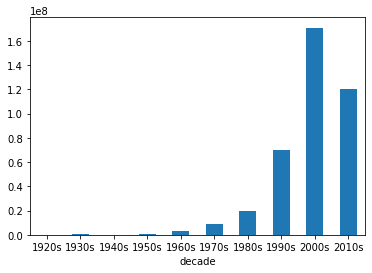

In [0]:
# Write your code for plotting number of voted users vs decade
df_by_decade.plot.bar(x='df_by_decade.decade', y= 'df_by_decade.num_voted_users', rot = 0)